<img src = "https://www.hh.se/images/18.4ad3d9ee1656d0f05ef643a3/1550842090193/hh-logo.svg" width = "150" align = "left">  
<br/>
<br/>
    
# Python, a Gateway to Machine Learning

<!--
<center> <img src = "https://www.link.cs.cmu.edu/splay/tree5.jpg" width = "200"></center>
<center><i>A Self-Adjusting Search Tree</i></center>
<center><i>by Jorge Stolfi</i></center>
<br>
-->

## Project: Asking questions to data using Pandas and NumPy

### Introduction

This is a Juypyter notebook that contains text and links for the last assignment of the course. The assignmement is designed as a project: an open ended task that allows you to apply what you learned about Python including Pandas and NumPy to ask questions and find answers to questions of social relevance. 

The topics you can choose are
*  climate change and its consequences,
* health care and its consequences or
* education and its consequences


On completion of your project this notebook should include the following parts:

* An introduction to what it is that you want to explore. 

* A description of the data sets that you use, including the sources and what kind of data they include.

* A section for loading the data (possibly from several data sets) including  code to explore and possibly clean or reorganize the data so that you can use it for the rest of the problem.
      
* A section that asks one or more questions that can be answered by exploring, combining, transforming the data.

      
* A section with programs for the questions.


* A section with an analysis of the results of your programs to explain the answers to your questions.

In each part there can be several cells, both code and markdown. But each section has to start with a markdown cell including at least the title of the section: you will find these cells with a little explanation alredy in the notebook.



This project is part of the examination of the course. There are instructions on how to submit, including deadlines and advice, in the Blackboard site for the course. Please follow these instructions. There you can also see what is needed in order to pass. 



# Advanced Global Warming EDA



After the horrors that happened this year in Pakistan due to floods, I decided to take a look to the global temperatures and how exactly are they evolving and have been evolving during the years.

1) What is climate change?
* Climate change refers to long-term shifts in temperatures and weather patterns. These shifts may be natural, such as through variations in the solar cycle. But since the 1800s, human activities have been the main driver of climate change, primarily due to burning fossil fuels like coal, oil and gas i.e. CO2 emissions.

2) What is global warming?
* Global warming is the long-term warming of the planet’s overall temperature.

3) Effects of global warming
* Temperature increase
* Sea level rise (because of massive ice mass loss)
* Shifts in flower's blooming
* Extreme weather events

4) Questions:
* What highest temperature is reached by Earth till now?
* Which are the top 8 hottest countries?
* Which is the hottest region?
* What is the highest average temperature of Pakistan from 1995-2020?
* What is the highest average CO2 emission done by Pakistan from 1995-2020?
* Which top 8 countries produces the high amount of CO2?
* Is CO2 emission directly related to population? 

## Data sources


Datasets used are from kaggle (1st link = https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities, 

2nd link = https://www.kaggle.com/datasets/moazzimalibhatti/co2-emission-by-countries-year-wise-17502022). 


1) CO2 emission by countries.csv:

* Country: Name of Country
* Code: Two letter short symbolic code
* Calling Code: Calling code of every country
* Year: Year of CO2 emission
* CO2 emission (Tons): Amount of CO2 emission in Tons
* Population(2022): Population of country in 2022
* Area: Area of that country in km2
* % of World: How much % of World landmass, this country covered
* Density(km2): Density according to Area in km2

2) city_temperature.csv

* Region: Name of Region
* Country: Name of Country
* State: Name of State
* City: Name of City
* Month: Month of observation
* Day: Day of observation
* Year: Year of Observation
* AvgTemperature: Average temperature on the given day (In fahrenheit)



## Data extraction



#### Importing Libraries

In [22]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Cleaning for city_temperature.csv

In [23]:
# Fetching data
Temp_city = pd.read_csv("city_temperature.csv", low_memory=False)
Temp_city.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [24]:
# Checking null values
Temp_city.isna().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [25]:
# Removing State column since it has many null values
Temp_city.drop(columns=["State"], inplace=True)
Temp_city.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [26]:
# Checking data type of columns
Temp_city.dtypes

Region             object
Country            object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [27]:
# Removing unwanted/non sense data
Temp_city = Temp_city.query("Month>0 & Month<=12 & Year>=1995 & Day>0 & Day<=31")

In [28]:
# Making a single Date
Temp_city["Date"] = Temp_city["Month"].apply(str)+"-"+Temp_city["Day"].apply(str)+"-"+Temp_city["Year"].apply(str)
Temp_city["Date"] = pd.to_datetime(Temp_city["Date"], infer_datetime_format=True)

#### Data Cleaning for CO2 emission by countries.csv

In [29]:
# Fetching data
CO2_data = pd.read_csv("CO2 emission by countries.csv", encoding='latin1')
CO2_data = CO2_data[CO2_data["Year"]>=1995]
CO2_data.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
245,Afghanistan,AF,93,1995,66834352.0,41128771.0,652230.0,0.40%,63/km²
246,Afghanistan,AF,93,1996,67999272.0,41128771.0,652230.0,0.40%,63/km²
247,Afghanistan,AF,93,1997,69083399.0,41128771.0,652230.0,0.40%,63/km²
248,Afghanistan,AF,93,1998,70112556.0,41128771.0,652230.0,0.40%,63/km²
249,Afghanistan,AF,93,1999,70922068.0,41128771.0,652230.0,0.40%,63/km²


In [30]:
# Checking data type of columns
CO2_data.dtypes

Country                 object
Code                    object
Calling Code            object
Year                     int64
CO2 emission (Tons)    float64
Population(2022)       float64
Area                   float64
% of World              object
Density(km2)            object
dtype: object

In [31]:
# Checking null values
CO2_data.isna().sum()

Country                  0
Code                   208
Calling Code           338
Year                     0
CO2 emission (Tons)      0
Population(2022)       624
Area                   416
% of World             416
Density(km2)           624
dtype: int64

In [32]:
# Removing Null values
CO2_data.dropna(axis=0, inplace=True)
CO2_data.isna().sum()

Country                0
Code                   0
Calling Code           0
Year                   0
CO2 emission (Tons)    0
Population(2022)       0
Area                   0
% of World             0
Density(km2)           0
dtype: int64

In [33]:
# Converting int to datetime
CO2_data["Year"] = pd.to_datetime(CO2_data["Year"], format="%Y")

## Programs



#### Analysis on Temperature

In [34]:
# Simple Summary Statistics
Temp_city.describe()

,Month,Day,Year,AvgTemperature
count,2.905879e+06,2.905879e+06,2.905879e+06,2.905879e+06
mean,6.468345e+00,1.571670e+01,2.006897e+03,5.602882e+01
std,3.456095e+00,8.800545e+00,7.277820e+00,3.206836e+01
min,1.000000e+00,1.000000e+00,1.995000e+03,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


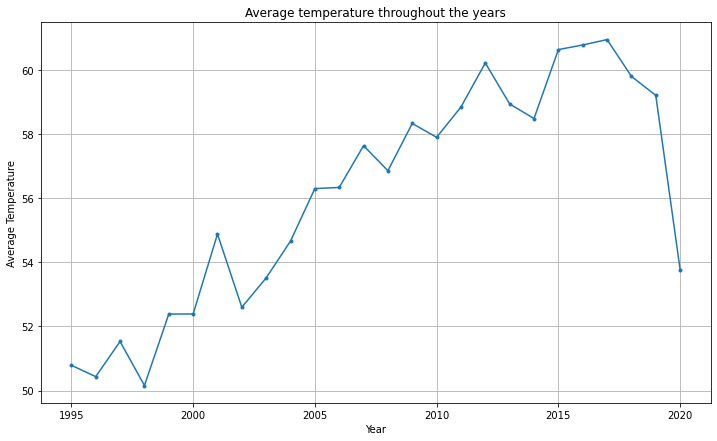

In [35]:
# Calculating average temperature throughout the years
avg_temp_year = Temp_city.groupby("Year")["AvgTemperature"].mean().plot(kind='line', figsize=(12,7), xlabel="Year", ylabel="Average Temperature", title="Average temperature throughout the years", style='.-', grid=True)

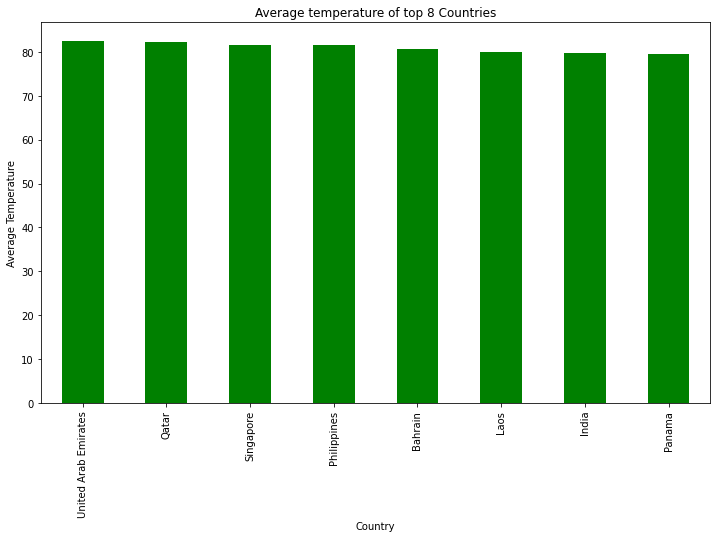

In [36]:
# Calculating average temperature of the countries
avg_temp_country = Temp_city.groupby("Country")["AvgTemperature"].mean().nlargest(n=8).plot(kind='bar', figsize=(12,7), xlabel="Country", ylabel="Average Temperature", title="Average temperature of top 8 Countries", color="green")

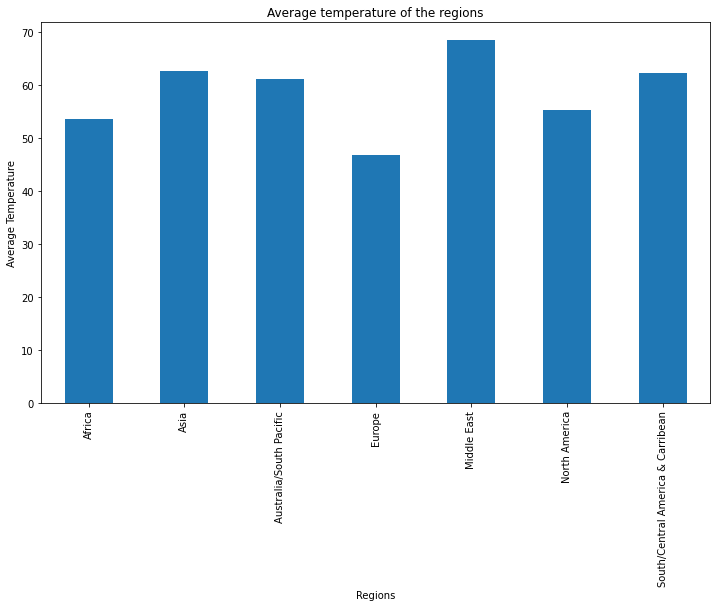

In [37]:
# Calculating average temperature of the regions
avg_temp_country = Temp_city.groupby("Region")["AvgTemperature"].mean().plot(kind='bar', figsize=(12,7), xlabel="Regions", ylabel="Average Temperature", title="Average temperature of the regions")

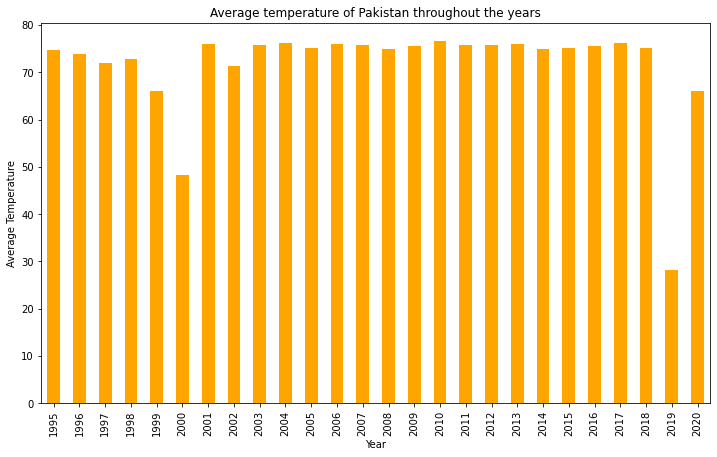

In [38]:
# Calculating average temperature of the Pakistan
pak_data = Temp_city[Temp_city["Country"]=="Pakistan"]
avg_temp_Pakistan = pak_data.groupby("Year")["AvgTemperature"].mean().plot(kind='bar', figsize=(12,7), xlabel="Year", ylabel="Average Temperature", title="Average temperature of Pakistan throughout the years", color="orange")

#### Analysis on CO2 emission

In [39]:
# Simple Summary Statistics
CO2_data.describe()

,CO2 emission (Tons),Population(2022),Area
count,4.654000e+03,4.654000e+03,4.654000e+03
mean,6.271985e+09,4.186199e+07,6.328071e+05
std,2.959561e+10,1.545832e+08,1.551714e+06
min,5.129600e+04,1.131200e+04,2.100000e+01
25%,3.563106e+07,2.305825e+06,2.633800e+04
50%,3.356367e+08,9.038309e+06,1.303730e+05
75%,2.379174e+09,3.054758e+07,5.516950e+05
max,4.170000e+11,1.425887e+09,9.984670e+06


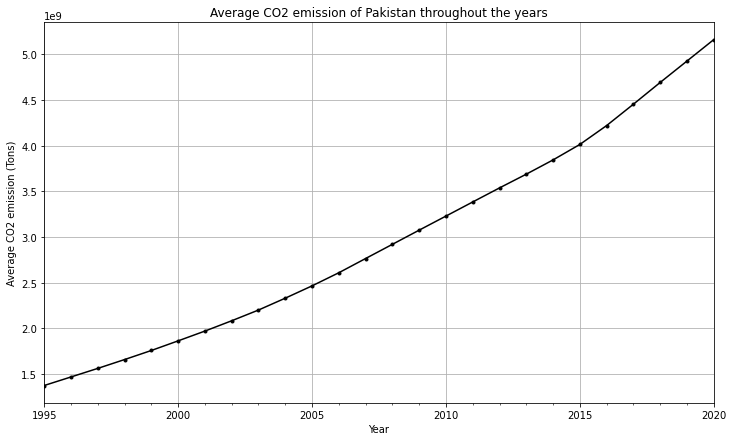

In [40]:
# Calculating average CO2 emission of Pakistan
pak_data_CO2 = CO2_data[CO2_data["Country"]=="Pakistan"]
avg_CO2_Pakistan = pak_data_CO2.groupby("Year")["CO2 emission (Tons)"].mean().plot(kind='line', figsize=(12,7), xlabel="Year", ylabel="Average CO2 emission (Tons)", title="Average CO2 emission of Pakistan throughout the years", color="black",style='.-', grid=True )

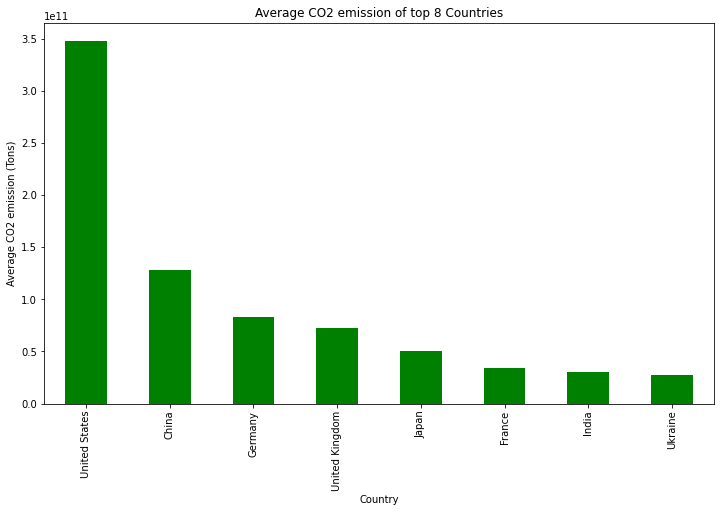

In [41]:
# Calculating average CO2 emission of the countries
avg_CO2_country = CO2_data.groupby("Country")["CO2 emission (Tons)"].mean().nlargest(n=8).plot(kind='bar', figsize=(12,7), xlabel="Country", ylabel="Average CO2 emission (Tons)", title="Average CO2 emission of top 8 Countries", color="green")

<AxesSubplot:>

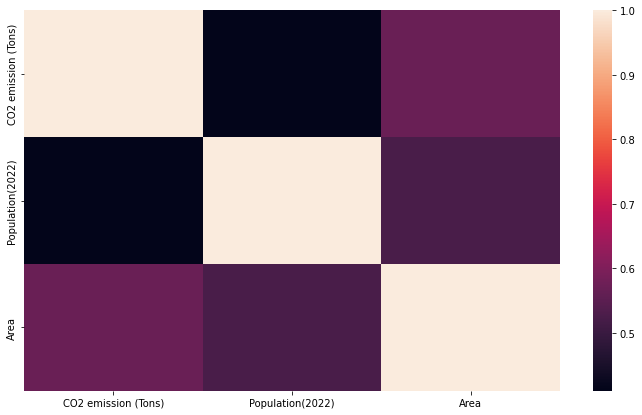

In [42]:
#Checking correlation
plt.figure(figsize=(12,7))
sns.heatmap(CO2_data.corr())

## Results and analysis



#### The result is that the CO2 emissions is one of the main cause for global warming. We should take immediate measures to reduce the CO2 emission/green house gases so that global warming can be reduced, hence saving our only planet Earth. Following are the QAs from the analysis.

> What highest temperature is reached by Earth till now?
* Earth reached the highest temperature in 2017.

> Which are the top 8 hottest countries?
* The top 8 hottest countries are UAE, Qatar, Singapore, Philippines, Bahrain, Laos, India, and Panama.

> Which is the hottest region?
* Middle East is the hottest region.

> What is the highest average temperature of Pakistan from 1995-2020?
* Highest average temperature of Pakistan is reached in 2010.

> What is the highest average CO2 emission done by Pakistan from 1995-2020?
* Highest average CO2 emission done by Pakistan in 2020 (upto 5.5x $10^9$ tonnes).

> Which top 8 countries produces the high amount of CO2?
* The top 8 countries that produces the high amount of CO2 are US, China, Germany, UK, Japan, France, India, and Ukraine.

> Is CO2 emission directly related to population? 
* Yes, according to the Pearson's correlation, both variables are positively correlated.
